In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay



In [ ]:
# grab train and test data set
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [ ]:
# show shape of both data
train.shape, test.shape

((15120, 56), (565892, 55))

In [ ]:
# gather knowledge about the train data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 56 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Id                                  15120 non-null  int64
 1   Elevation                           15120 non-null  int64
 2   Aspect                              15120 non-null  int64
 3   Slope                               15120 non-null  int64
 4   Horizontal_Distance_To_Hydrology    15120 non-null  int64
 5   Vertical_Distance_To_Hydrology      15120 non-null  int64
 6   Horizontal_Distance_To_Roadways     15120 non-null  int64
 7   Hillshade_9am                       15120 non-null  int64
 8   Hillshade_Noon                      15120 non-null  int64
 9   Hillshade_3pm                       15120 non-null  int64
 10  Horizontal_Distance_To_Fire_Points  15120 non-null  int64
 11  Wilderness_Area1                    15120 non-null  int64
 12  Wild

In [ ]:
# more info of the data
train.describe()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,15120.00000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,...,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,7560.50000,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,...,0.045635,0.040741,0.001455,0.006746,0.000661,0.002249,0.048148,0.043452,0.030357,4.000000
std,4364.91237,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,...,0.208699,0.197696,0.038118,0.081859,0.025710,0.047368,0.214086,0.203880,0.171574,2.000066
min,1.00000,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3780.75000,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,7560.50000,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,11340.25000,3104.000000,261.000000,22.000000,330.000000,79.000000,2270.000000,235.000000,235.000000,167.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
max,15120.00000,3849.000000,360.000000,52.000000,1343.000000,554.000000,6890.000000,254.000000,254.000000,248.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


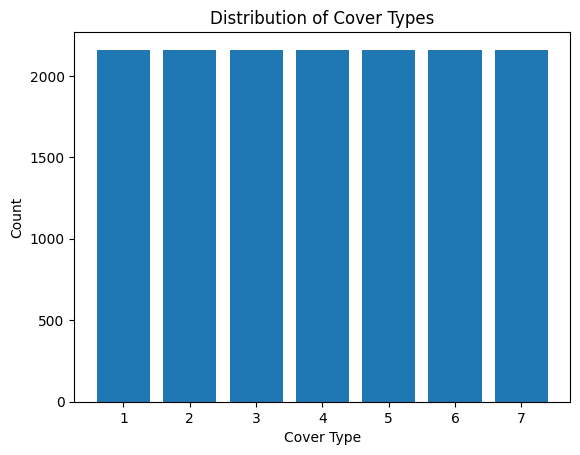

In [ ]:
# gather information about the distrubtion of the class we are predicting
cover_distribution = train['Cover_Type'].value_counts()

# plot it to get a better idea
plt.bar(cover_distribution.index, cover_distribution.values)
plt.xlabel('Cover Type')
plt.ylabel('Count')
plt.title('Distribution of Cover Types')
plt.show()




In [ ]:
# find out more about the features in the data
for col in train.columns:
    print(f'{col}: {train[col].nunique()} unique values')

Id: 15120 unique values
Elevation: 1665 unique values
Aspect: 361 unique values
Slope: 52 unique values
Horizontal_Distance_To_Hydrology: 400 unique values
Vertical_Distance_To_Hydrology: 423 unique values
Horizontal_Distance_To_Roadways: 3250 unique values
Hillshade_9am: 176 unique values
Hillshade_Noon: 141 unique values
Hillshade_3pm: 247 unique values
Horizontal_Distance_To_Fire_Points: 2710 unique values
Wilderness_Area1: 2 unique values
Wilderness_Area2: 2 unique values
Wilderness_Area3: 2 unique values
Wilderness_Area4: 2 unique values
Soil_Type1: 2 unique values
Soil_Type2: 2 unique values
Soil_Type3: 2 unique values
Soil_Type4: 2 unique values
Soil_Type5: 2 unique values
Soil_Type6: 2 unique values
Soil_Type7: 1 unique values
Soil_Type8: 2 unique values
Soil_Type9: 2 unique values
Soil_Type10: 2 unique values
Soil_Type11: 2 unique values
Soil_Type12: 2 unique values
Soil_Type13: 2 unique values
Soil_Type14: 2 unique values
Soil_Type15: 1 unique values
Soil_Type16: 2 unique val

In [ ]:
# again more information
for col in train.columns:
    print(train[col].value_counts())

Id
1        1
10086    1
10074    1
10075    1
10076    1
        ..
5044     1
5045     1
5046     1
5047     1
15120    1
Name: count, Length: 15120, dtype: int64
Elevation
2830    25
2290    25
3371    24
2952    23
2955    23
        ..
3692     1
3694     1
3702     1
3728     1
3604     1
Name: count, Length: 1665, dtype: int64
Aspect
45     117
0      110
90     109
63      89
76      87
      ... 
263     10
248     10
249      9
226      7
360      2
Name: count, Length: 361, dtype: int64
Slope
11    740
10    739
13    717
14    699
12    677
15    664
9     664
16    640
17    598
8     574
7     573
18    558
20    552
19    519
21    465
6     465
22    458
23    450
5     423
24    394
25    359
26    329
28    313
4     305
27    297
29    258
31    218
30    216
3     210
32    187
33    143
2     134
34    131
35    101
1      78
36     68
37     58
38     36
39     32
41     18
40     16
46     15
44      5
0       5
49      5
45      3
47      3
42      3
43      2
4

In [ ]:
# remove some columns to manage the data more easier

columns_to_drop = ['Soil_Type7']

# find duplicated columns

duplicated_columns = train.T.duplicated()
duplicated_columns

,0
Id,False
Elevation,False
Aspect,False
Slope,False
Horizontal_Distance_To_Hydrology,False
Vertical_Distance_To_Hydrology,False
Horizontal_Distance_To_Roadways,False
Hillshade_9am,False
Hillshade_Noon,False
Hillshade_3pm,False


In [ ]:
# add duplicated columns to the list of columns to drop
for col in train.columns[duplicated_columns]:
    columns_to_drop.append(col)


In [ ]:
# find missing values
missing_values = train.isnull().sum()
missing_values
# no missing values no need to add


,0
Id,0
Elevation,0
Aspect,0
Slope,0
Horizontal_Distance_To_Hydrology,0
Vertical_Distance_To_Hydrology,0
Horizontal_Distance_To_Roadways,0
Hillshade_9am,0
Hillshade_Noon,0
Hillshade_3pm,0


In [ ]:
# find columns with high or low variation

# set high and low variation threshold
low_variation = .01
high_variation = 10

# coefficient of variation
cv = train.std() / train.mean()

# append low or high var columns to columns to drop

for col in cv[cv < low_variation].index:
    columns_to_drop.append(col)

for col in cv[cv > high_variation].index:
    columns_to_drop.append(col)

# drop the columns from the list
cleaned_train = train.drop(columns=columns_to_drop)
cleaned_test = test.drop(columns=columns_to_drop)
cleaned_train

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type24,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,1,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,1,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,1,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,1,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15115,15116,2607,243,23,258,7,660,170,251,214,...,0,0,0,0,0,0,0,0,0,3
15116,15117,2603,121,19,633,195,618,249,221,91,...,0,0,0,0,0,0,0,0,0,3
15117,15118,2492,134,25,365,117,335,250,220,83,...,0,0,0,0,0,0,0,0,0,3
15118,15119,2487,167,28,218,101,242,229,237,119,...,0,0,0,0,0,0,0,0,0,3


In [ ]:
# droppped columns
columns_to_drop

['Soil_Type7',
 'Soil_Type15',
 'Soil_Type15',
 'Soil_Type8',
 'Soil_Type9',
 'Soil_Type16',
 'Soil_Type18',
 'Soil_Type19',
 'Soil_Type20',
 'Soil_Type21',
 'Soil_Type25',
 'Soil_Type26',
 'Soil_Type27',
 'Soil_Type28',
 'Soil_Type34',
 'Soil_Type35',
 'Soil_Type36',
 'Soil_Type37',
 'Soil_Type8',
 'Soil_Type9',
 'Soil_Type16',
 'Soil_Type18',
 'Soil_Type19',
 'Soil_Type20',
 'Soil_Type21',
 'Soil_Type25',
 'Soil_Type26',
 'Soil_Type27',
 'Soil_Type28',
 'Soil_Type34',
 'Soil_Type35',
 'Soil_Type36',
 'Soil_Type37',
 'Soil_Type8',
 'Soil_Type9',
 'Soil_Type16',
 'Soil_Type18',
 'Soil_Type19',
 'Soil_Type20',
 'Soil_Type21',
 'Soil_Type25',
 'Soil_Type26',
 'Soil_Type27',
 'Soil_Type28',
 'Soil_Type34',
 'Soil_Type35',
 'Soil_Type36',
 'Soil_Type37',
 'Soil_Type8',
 'Soil_Type9',
 'Soil_Type16',
 'Soil_Type18',
 'Soil_Type19',
 'Soil_Type20',
 'Soil_Type21',
 'Soil_Type25',
 'Soil_Type26',
 'Soil_Type27',
 'Soil_Type28',
 'Soil_Type34',
 'Soil_Type35',
 'Soil_Type36',
 'Soil_Type37']

In [ ]:
# get a idea of our new cleaned_dataset
cleaned_train.shape, cleaned_test.shape

((15120, 39), (565892, 38))

In [ ]:
cleaned_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 39 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Id                                  15120 non-null  int64
 1   Elevation                           15120 non-null  int64
 2   Aspect                              15120 non-null  int64
 3   Slope                               15120 non-null  int64
 4   Horizontal_Distance_To_Hydrology    15120 non-null  int64
 5   Vertical_Distance_To_Hydrology      15120 non-null  int64
 6   Horizontal_Distance_To_Roadways     15120 non-null  int64
 7   Hillshade_9am                       15120 non-null  int64
 8   Hillshade_Noon                      15120 non-null  int64
 9   Hillshade_3pm                       15120 non-null  int64
 10  Horizontal_Distance_To_Fire_Points  15120 non-null  int64
 11  Wilderness_Area1                    15120 non-null  int64
 12  Wild

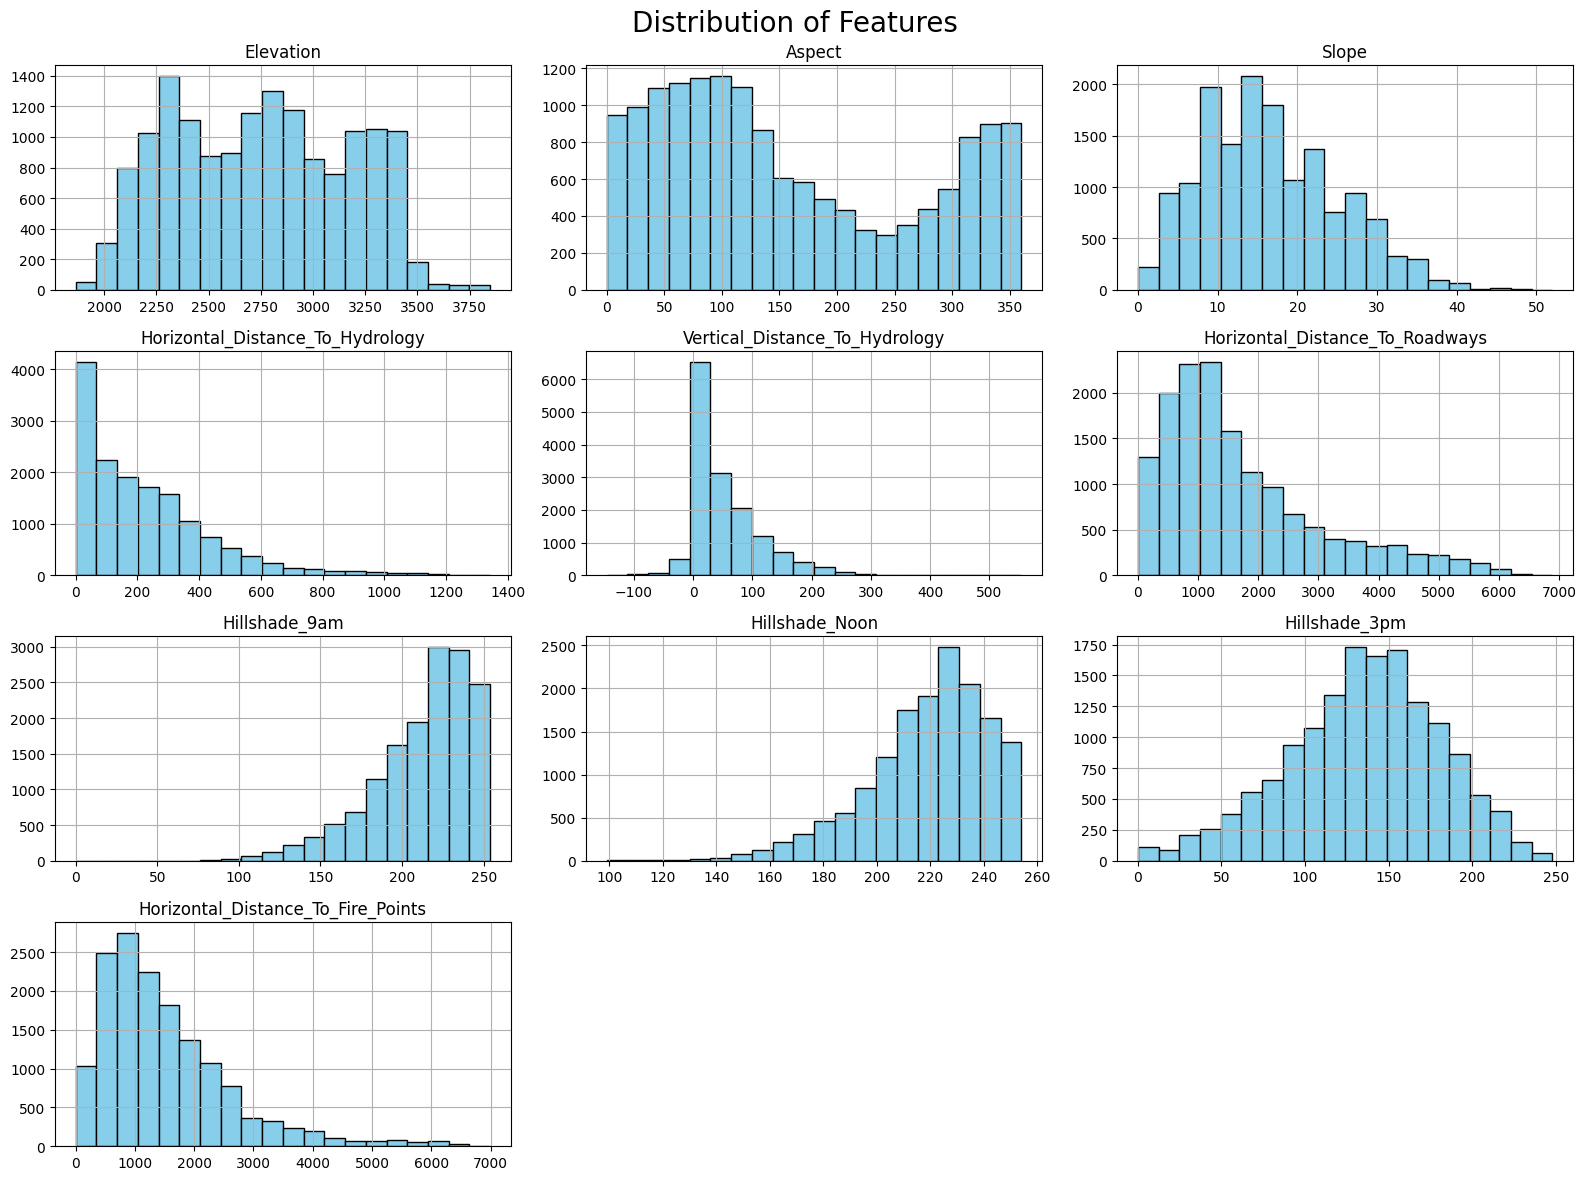

In [ ]:
# show some visualization of the features

independent_features = ['Elevation', 'Aspect', 'Slope','Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology','Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm','Horizontal_Distance_To_Fire_Points']

data_to_plot = cleaned_train[independent_features]

data_to_plot.hist(bins=20, figsize=(16,12), color='skyblue', edgecolor='black')
plt.suptitle('Distribution of Features', fontsize=20)
plt.tight_layout()
plt.show()

In [ ]:
# Create our X and y to work with our models

X = cleaned_train.drop(columns=['Cover_Type', 'Id'])
y = cleaned_train['Cover_Type'] - 1
X_test = cleaned_test.drop(columns='Id')

# Split our data with 80-20 split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)



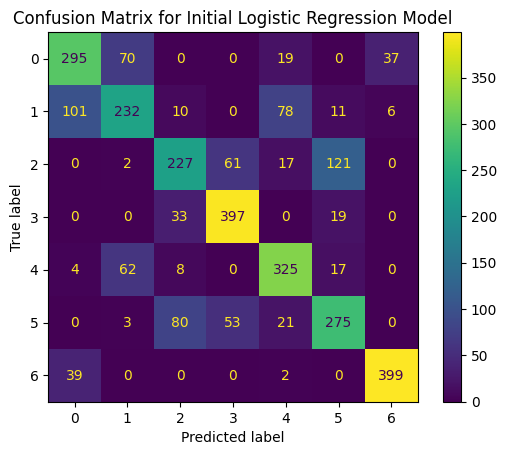

Mean Accuracy for Cross-Validation: 0.7055
Standard Deviation for Cross-Validation: 0.0094


In [ ]:
# create our inital logistic regression model
logistic_reg_model_1 = LogisticRegression(max_iter=1000, solver='lbfgs')

# use n-fold cross-validation
n_folds = 5
scores = cross_val_score(logistic_reg_model_1, X_train_scaled, y_train, cv=n_folds, scoring='accuracy')
mean_accuracy_cv = np.mean(scores)
std_cv = np.std(scores)

# Fit the logistic regression model
logistic_reg_model_1.fit(X_train_scaled, y_train)

# Make predictions on the validation set
y_pred = logistic_reg_model_1.predict(X_val_scaled)

# Create confusion matrix
cm = confusion_matrix(y_val, y_pred)

# Plot confusion matrix
display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot()
plt.title('Confusion Matrix for Initial Logistic Regression Model')
plt.show()

# Print the results for initial model
print(f'Mean Accuracy for Cross-Validation: {mean_accuracy_cv:.4f}')
print(f'Standard Deviation for Cross-Validation: {std_cv:.4f}')


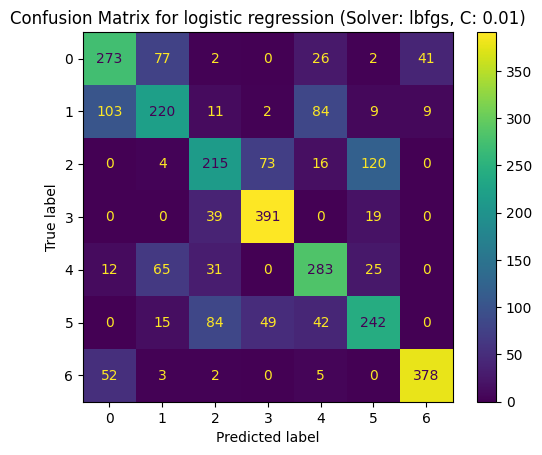

Logistic Regresion Model (Solver: lbfgs, C: 0.01):
Mean Accuracy for Cross-Validation 0.6573
Standard Deviation for Cross-Validation 0.0097


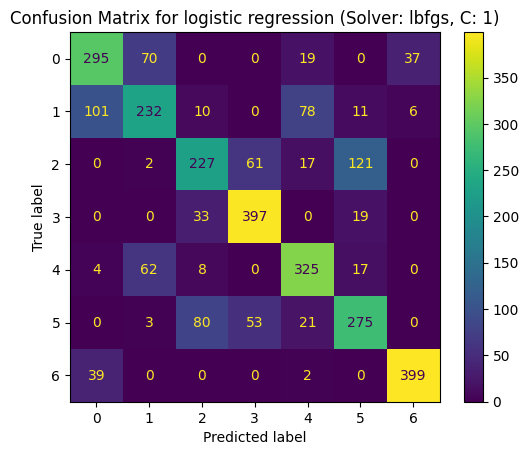

Logistic Regresion Model (Solver: lbfgs, C: 1):
Mean Accuracy for Cross-Validation 0.7055
Standard Deviation for Cross-Validation 0.0094


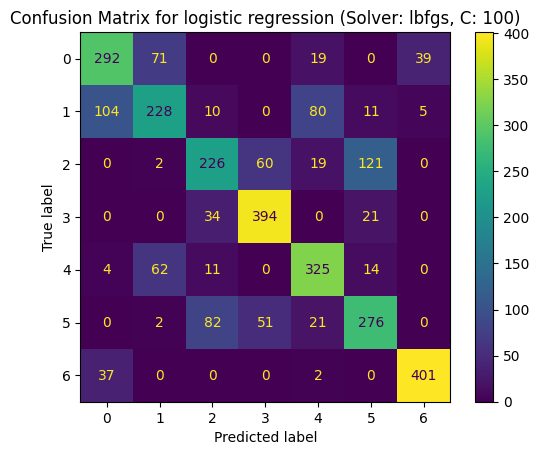

Logistic Regresion Model (Solver: lbfgs, C: 100):
Mean Accuracy for Cross-Validation 0.7070
Standard Deviation for Cross-Validation 0.0080


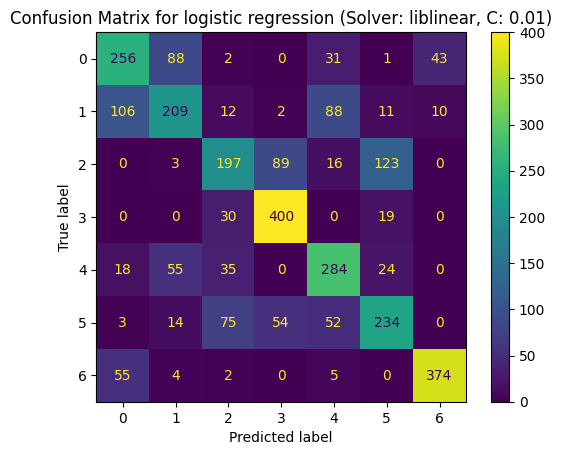

Logistic Regresion Model (Solver: liblinear, C: 0.01):
Mean Accuracy for Cross-Validation 0.6391
Standard Deviation for Cross-Validation 0.0094


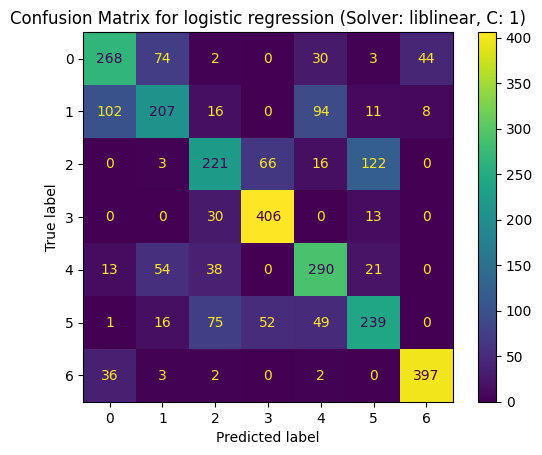

Logistic Regresion Model (Solver: liblinear, C: 1):
Mean Accuracy for Cross-Validation 0.6665
Standard Deviation for Cross-Validation 0.0091


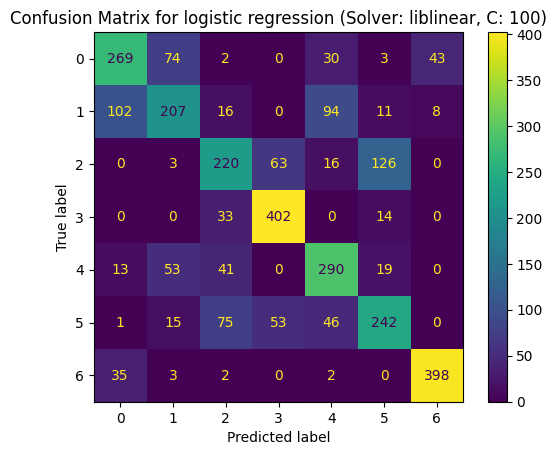

Logistic Regresion Model (Solver: liblinear, C: 100):
Mean Accuracy for Cross-Validation 0.6696
Standard Deviation for Cross-Validation 0.0097


In [ ]:
# create multiple different logistic regression models

# create the parameters to change
c_values = [0.01, 1, 100]
solvers = ['lbfgs', 'liblinear']

# store the results of the models
results = []

# loop over each c_value for each solver

for solver in solvers:
  for c_value in c_values:
    # create the model
    model = LogisticRegression(max_iter=1000, solver=solver, C=c_value)

    # fit the model
    model.fit(X_train_scaled, y_train)

    # make predictions
    y_pred = model.predict(X_val_scaled)

    # find mean accuracy and standard deviation
    scores = cross_val_score(model, X_train_scaled, y_train, cv=n_folds, scoring='accuracy')
    mean_accuracy_cv = np.mean(scores)
    std_cv = np.std(scores)

    # save the results
    results.append({
      'Solver': solver,
      'c_value': c_value,
      'Mean_accuracy_cv': mean_accuracy_cv,
      'Std_cv': std_cv
    })

    # create confusion matrix
    cm = confusion_matrix(y_val, y_pred)
    display = ConfusionMatrixDisplay(confusion_matrix=cm)
    display.plot()
    plt.title(f'Confusion Matrix for logistic regression (Solver: {solver}, C: {c_value})')
    plt.show()

    # print the results

    print(f'Logistic Regresion Model (Solver: {solver}, C: {c_value}):')
    print(f'Mean Accuracy for Cross-Validation {mean_accuracy_cv:.4f}')
    print(f'Standard Deviation for Cross-Validation {std_cv:.4f}')

76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


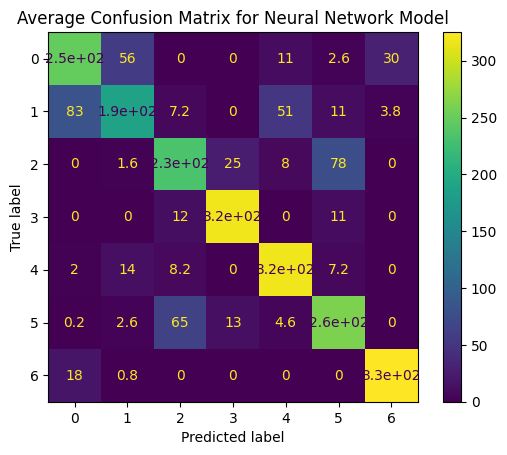

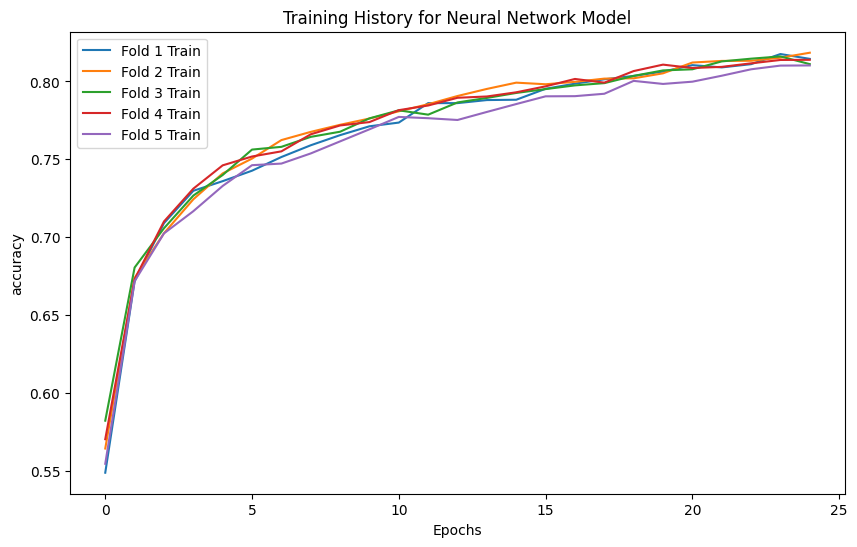

Mean Accuracy for Cross-Validation: 0.7817
Standard Deviation for Cross-Validation: 0.0063


In [67]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
import seaborn as sns

# now for an intial neural network model
# function to define model
def initial_model():
  # 3 layers
  model = Sequential([
      Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
      Dense(32, activation='relu'),
      #output layer has 7 neurons because that is how many cover types we have to classify
      Dense(7, activation='softmax')

  ])

  # compile the model and return it
  model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  return model

# set the epochs and the k_folds
epochs = 25
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# create lists to store metrics

nn_scores = []
histories = []
confusion_matrices = []

# loop over the folds
for train_index, val_index in kf.split(X_train_scaled):
  X_train_fold, X_val_fold = X_train_scaled[train_index], X_train_scaled[val_index]
  y_fold_train, y_fold_val = y_train.iloc[train_index], y_train.iloc[val_index]

  # create the model
  model = initial_model()

  # train the model and record history
  history = model.fit(X_train_fold, y_fold_train, epochs=epochs, batch_size=32, verbose=0)
  histories.append(history)

  # evaluate the model
  val_loss, val_accuracy = model.evaluate(X_val_fold, y_fold_val, verbose=0)
  nn_scores.append(val_accuracy)

  # create predictions
  y_pred = model.predict(X_val_fold)
  y_pred_classes = np.argmax(y_pred, axis=1)

  # create confusion matrix
  cm = confusion_matrix(y_fold_val, y_pred_classes)
  confusion_matrices.append(cm)


# calculate the mean and std
mean_nn_score = np.mean(nn_scores)
std_nn_score = np.std(nn_scores)

# calcuate the avg confusion matrix of all confusion matrix
avg_cm = np.mean(confusion_matrices, axis=0)

# display the average confusion matrix
display = ConfusionMatrixDisplay(confusion_matrix=avg_cm)
display.plot()
plt.title('Average Confusion Matrix for Neural Network Model')
plt.show()


#  plot training history for each fold
plt.figure(figsize=(10, 6))
plt.title('Training History for Neural Network Model')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
for i, history in enumerate(histories):
  plt.plot(history.history['accuracy'], label=f'Fold {i+1} Train')
plt.legend()
plt.show()

# show cv results
print(f'Mean Accuracy for Cross-Validation: {mean_nn_score:.4f}')
print(f'Standard Deviation for Cross-Validation: {std_nn_score:.4f}')








In [68]:
# create different neural neural

def nn_model_1():
  model = Sequential([
      Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
      Dense(32, activation='relu'),
      Dense(7, activation='softmax')
  ])
  model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  return model

def nn_model_2():
  model = Sequential([
      Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
      Dense(32, activation='relu'),
      Dense(7, activation='softmax')
  ])
  model.compile(optimizer=Adam(learning_rate=0.01), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  return model

def nn_model_3():
  model = Sequential([
      Dense(64, activation='tanh', input_shape=(X_train_scaled.shape[1],)),
      Dense(32, activation='tanh'),
      Dense(7, activation='softmax')
  ])
  model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  return model

def nn_model_4():
  model = Sequential([
      Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
      Dense(32, activation='relu'),
      Dense(16, activation='relu'),
      Dense(7, activation='softmax')
  ])
  model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  return model

def nn_model_5():
  model = Sequential([
      Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
      Dense(64, activation='relu'),
      Dense(7, activation='softmax')
  ])
  model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  return model

def nn_model_6():
  model = Sequential([
      Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
      Dense(32, activation='relu'),
      Dense(7, activation='softmax')
  ])
  model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  return model

def nn_model_7():
  model = Sequential([
      Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
      Dense(32, activation='sigmoid'),
      Dense(7, activation='softmax')
  ])
  model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  return model

def nn_model_8():
  model = Sequential([
      Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
      Dense(64, activation='relu'),
      Dense(32, activation='relu'),
      Dense(7, activation='softmax')
  ])
  model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  return model






In [72]:
# create function to evalute models

def evaluate_model(model_func, model_name):
  nn_cv_scores = []
  histories = []
  confusion_matrices = []

  for train_index, val_index in kf.split(X_train_scaled):
    X_train_fold, X_val_fold = X_train_scaled[train_index], X_train_scaled[val_index]
    y_fold_train, y_fold_val = y_train.iloc[train_index], y_train.iloc[val_index]

    # train the current model
    model = model_func()
    history = model.fit(X_train_fold, y_fold_train, epochs=epochs, batch_size=32, verbose=0)
    histories.append(history)

    # evaluate the model
    val_loss, val_accuracy = model.evaluate(X_val_fold, y_fold_val, verbose=0)
    nn_cv_scores.append(val_accuracy)

    # create predictions
    y_pred = model.predict(X_val_fold)
    y_pred_classes = np.argmax(y_pred, axis=1)

    # create confusion matrix
    cm = confusion_matrix(y_fold_val, y_pred_classes)
    confusion_matrices.append(cm)

  # calculate the mean and std
  mean_nn_score = np.mean(nn_cv_scores)
  std_nn_score = np.std(nn_cv_scores)

  # calculate the avg confusion matrix of all confusion matrix
  avg_cm = np.mean(confusion_matrices, axis=0)

  # display the average confusion matrix
  display = ConfusionMatrixDisplay(confusion_matrix=avg_cm)
  display.plot()
  plt.title(f'Average Confusion Matrix for {model_name}')
  plt.show()

  # plot training history for each fold
  plt.figure(figsize=(10, 6))
  plt.title(f'Training History for {model_name}')
  plt.xlabel('Epochs')
  plt.ylabel('accuracy')
  for i, history in enumerate(histories):
    plt.plot(history.history['accuracy'], label=f'Fold {i+1} Train')
  plt.legend()
  plt.show()

  # print cv results
  print(f'Mean Accuracy for Cross-Validation: {mean_nn_score:.4f}')
  print(f'Standard Deviation for Cross-Validation: {std_nn_score:.4f}')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/gradio/queueing.py", line 624, in process_events
    response = await route_utils.call_process_api(
  File "/usr/local/lib/python3.10/dist-packages/gradio/route_utils.py", line 323, in call_process_api
    output = await app.get_blocks().process_api(
  File "/usr/local/lib/python3.10/dist-packages/gradio/blocks.py", line 2025, in process_api
    data = await self.postprocess_data(block_fn, result["prediction"], state)
  File "/usr/local/lib/python3.10/dist-packages/gradio/blocks.py", line 1831, in postprocess_data
    prediction_value = block.postprocess(prediction_value)
  File 

76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


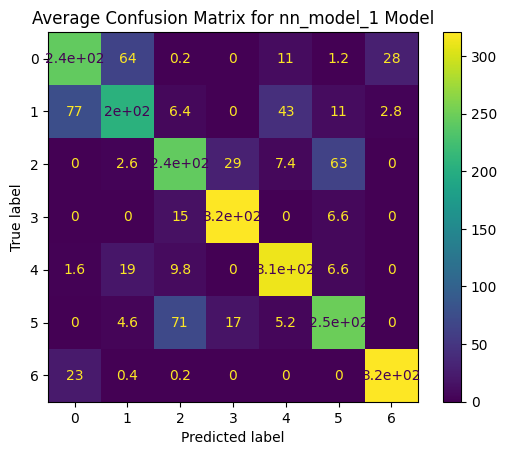

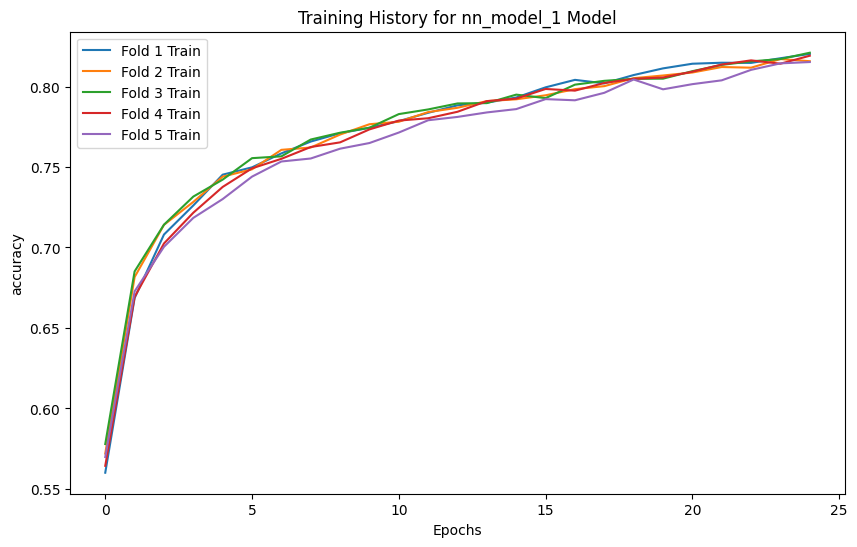

Mean Accuracy for Cross-Validation: 0.7824
Standard Deviation for Cross-Validation: 0.0059


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


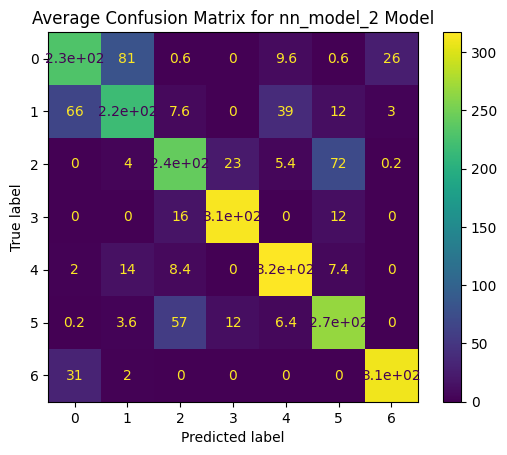

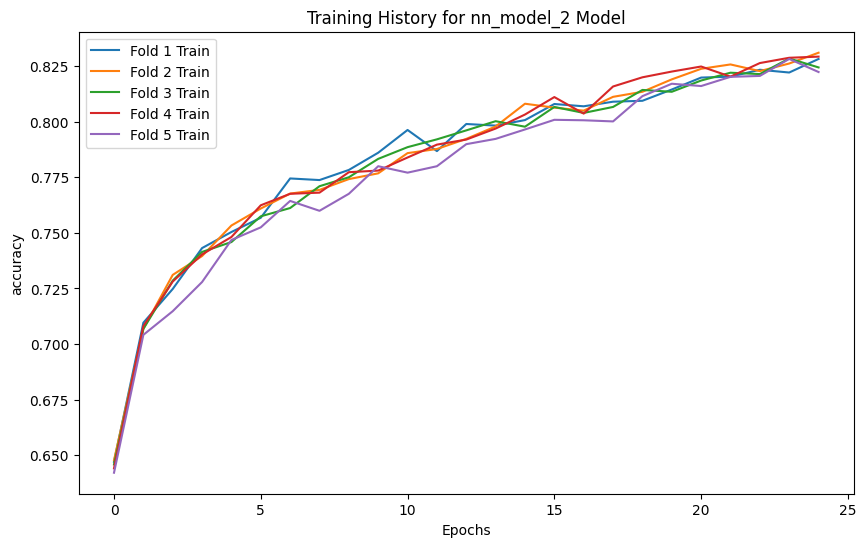

Mean Accuracy for Cross-Validation: 0.7842
Standard Deviation for Cross-Validation: 0.0065


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


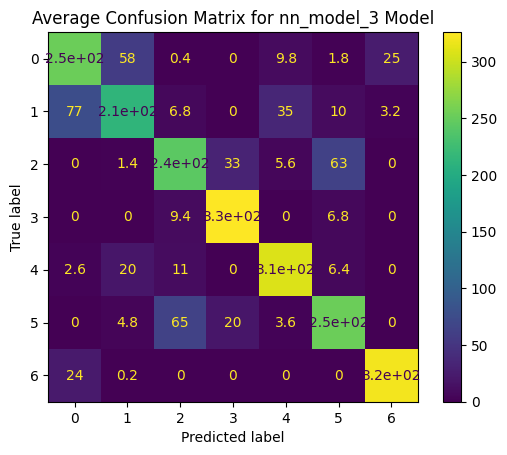

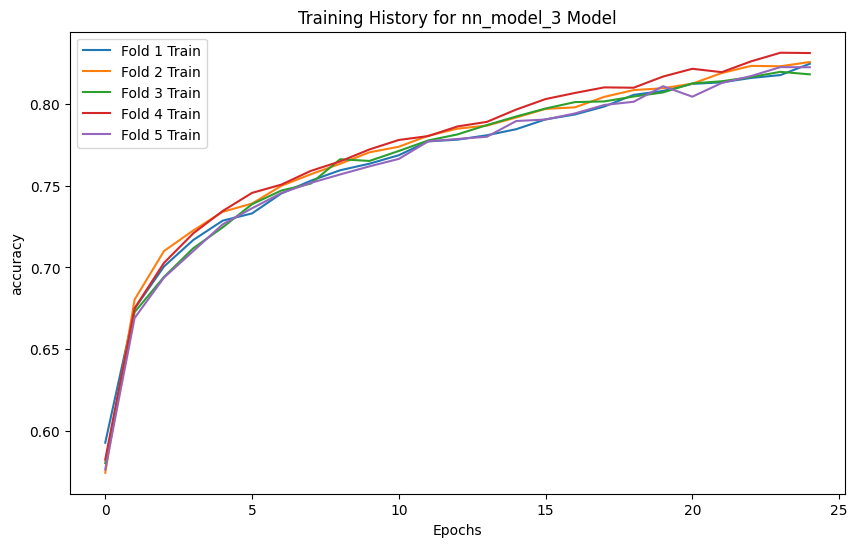

Mean Accuracy for Cross-Validation: 0.7918
Standard Deviation for Cross-Validation: 0.0024


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


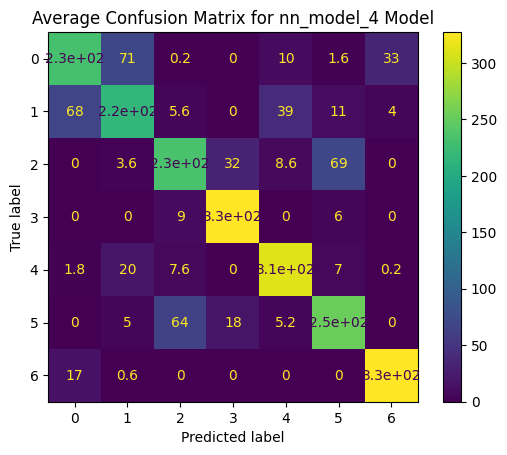

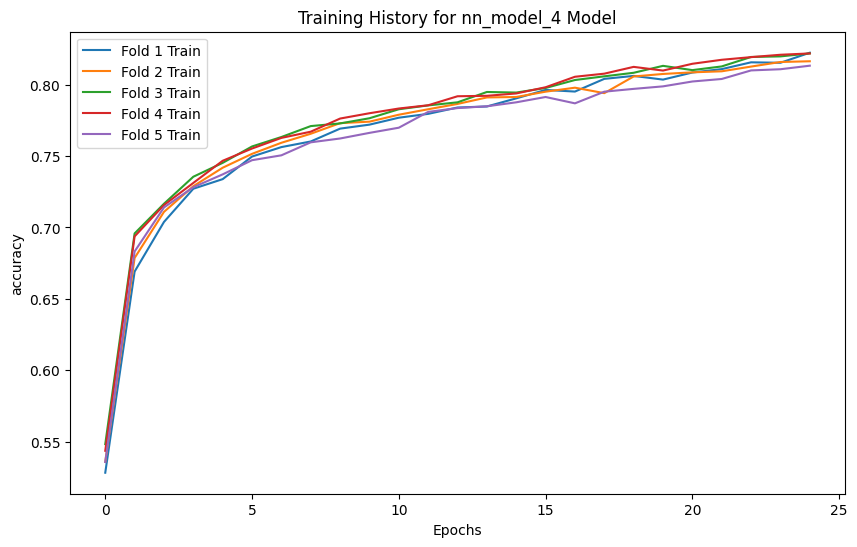

Mean Accuracy for Cross-Validation: 0.7855
Standard Deviation for Cross-Validation: 0.0060


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/gradio/queueing.py", line 624, in process_events
    response = await route_utils.call_process_api(
  File "/usr/local/lib/python3.10/dist-packages/gradio/route_utils.py", line 323, in call_process_api
    output = await app.get_blocks().process_api(
  File "/usr/local/lib/python3.10/dist-packages/gradio/blocks.py", line 2025, in process_api
    data = await self.postprocess_data(block_fn, result["prediction"], state)
  File "/usr/local/lib/python3.10/dist-packages/gradio/blocks.py", line 1831, in postprocess_data
    prediction_value = block.postprocess(prediction_value)
  File "/usr/local/lib/python3.10/dist-packages/gradio/components/json_component.py", line 115, in postprocess
    return JsonData(orjson.loads(value))
orjson.JSONDecodeError: unexpected character: line 1 column 1 (char 0)


76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


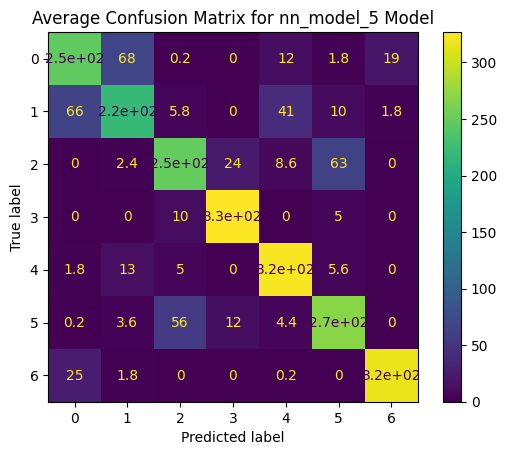

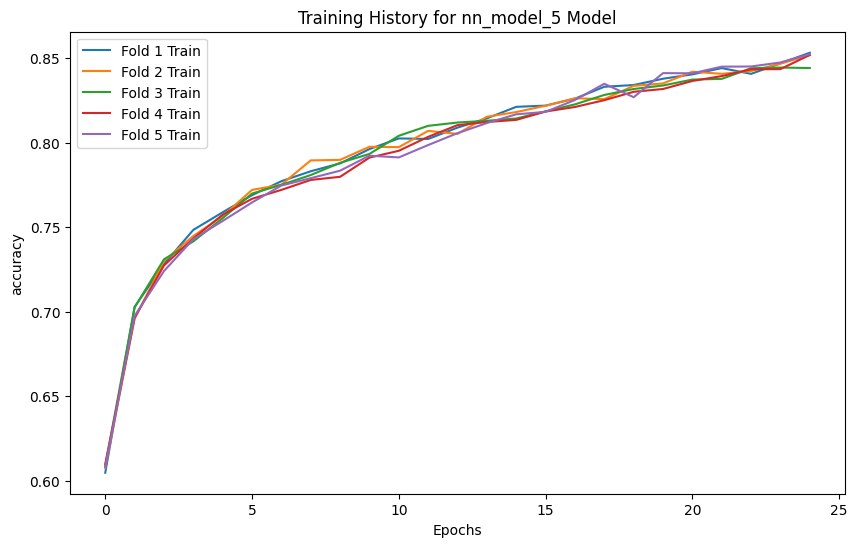

Mean Accuracy for Cross-Validation: 0.8067
Standard Deviation for Cross-Validation: 0.0071


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


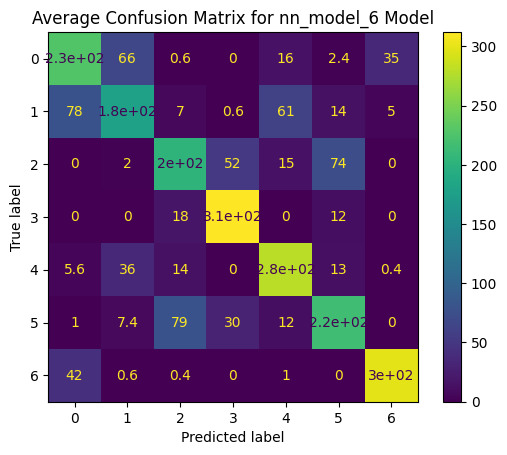

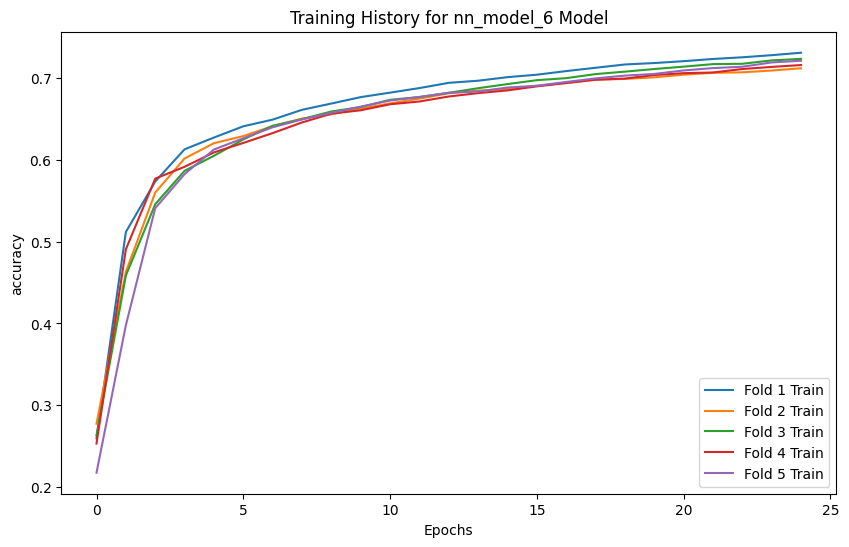

Mean Accuracy for Cross-Validation: 0.7101
Standard Deviation for Cross-Validation: 0.0094


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


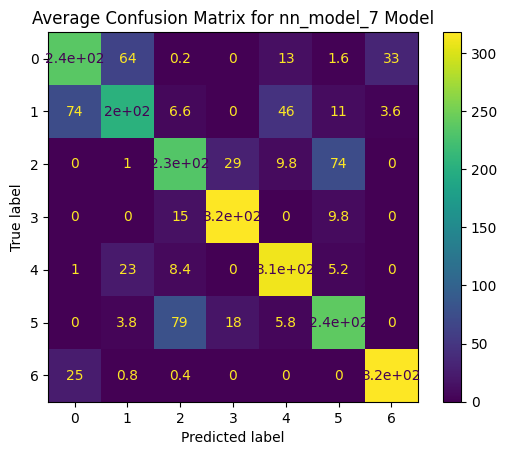

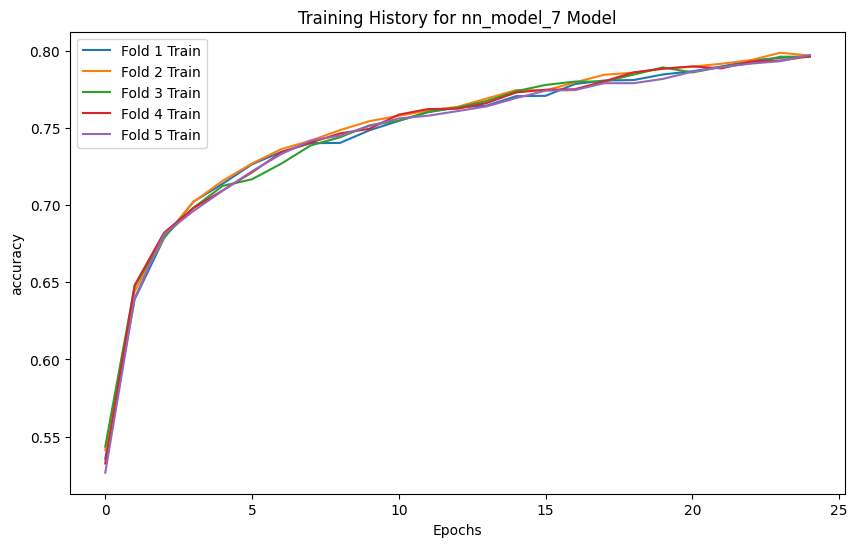

Mean Accuracy for Cross-Validation: 0.7683
Standard Deviation for Cross-Validation: 0.0086


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


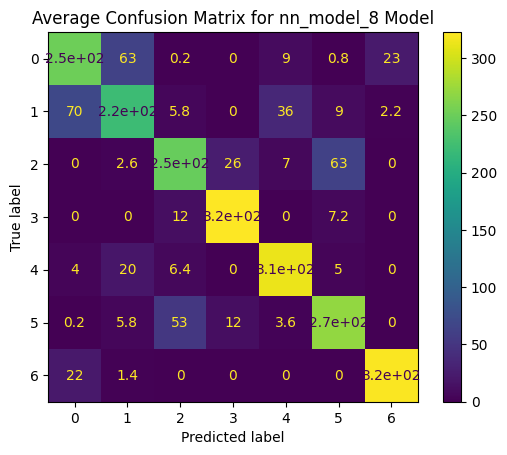

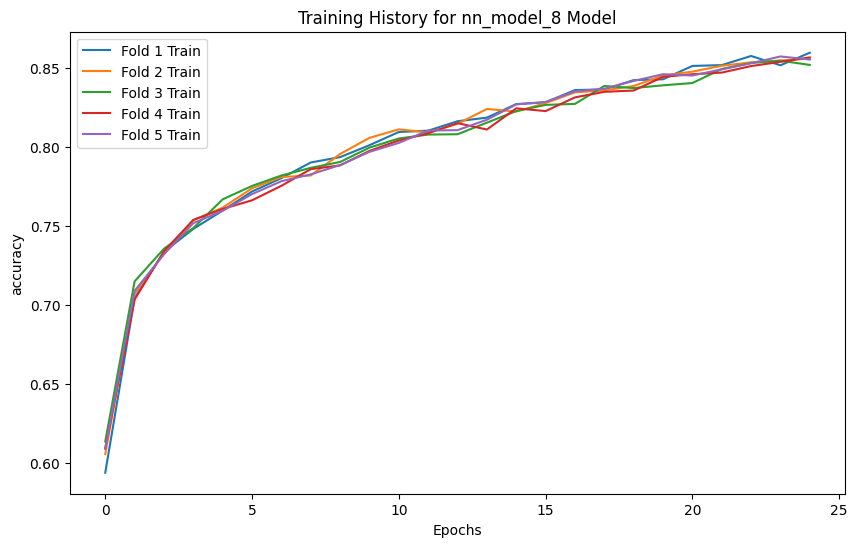

Mean Accuracy for Cross-Validation: 0.8053
Standard Deviation for Cross-Validation: 0.0073


In [85]:
# create list of tuples for each model
model_functions = [
    (nn_model_1, "nn_model_1"),
    (nn_model_2, "nn_model_2"),
    (nn_model_3, "nn_model_3"),
    (nn_model_4, "nn_model_4"),
    (nn_model_5, "nn_model_5"),
    (nn_model_6, "nn_model_6"),
    (nn_model_7, "nn_model_7"),
    (nn_model_8, "nn_model_8")
]

# run the function for each model
for model_func, model_name in model_functions:
  evaluate_model(model_func, model_name)

In [75]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.7/56.7 MB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.8/319.8 kB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.7/94.7 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 447.5/447.5 kB 26.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 94.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.3/73.3 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 7.4 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.24.7
    Uninstalling huggingface-hub-0.24.7:
      Successfully uninstalled huggingface-hub-0.24.7


In [87]:
#load test data
test_data = pd.read_csv('data/test.csv')
test_data = test_data.drop(columns=columns_to_drop)

# make test_ids to locate rows
test_ids = test_data['Id']

# scale the data
X_test_scaled = scaler.transform(test_data.drop(columns='Id'))

#create a mapping for the forest cover type

forest_type = {
    1: 'Spruce/Fir',
    2: 'Lodgepole Pine',
    3: 'Ponderosa Pine',
    4: 'Cottonwood/Willow',
    5: 'Aspen',
    6: 'Douglas-fir',
    7: 'Krummholz'
}


#using model 8 because it has highest accuray
model = nn_model_5()
model.fit(X_train_scaled, y_train, epochs=epochs, batch_size=32, verbose=0)

# create function to make prediction based on certain test_id
def predict_cover_type(test_id):
  try:
    #locate the rows in the test set using inputted id
    row_index = test_ids[test_ids == test_id].index[0]
    X_row = X_test_scaled[row_index].reshape(1, -1)

    # make prediction
    nn_pred = np.argmax(model.predict(X_row)) + 1
    forest_type_pred = forest_type.get(nn_pred, 'unkown_type')

    return {
        'Neural Netowrk Predicted Class': nn_pred,
        'Neural Network Predicted Forest Type': forest_type_pred
    }

  except (IndexError, ValueError):
    return {"Error": "Invalid test_id. Please enter a test_id between 15121 and 581012."}







/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [88]:
#using gradio for app
import gradio as gr

gr.Interface(
    fn=predict_cover_type,
    inputs='number',
    outputs='json',
    title='Cover Type Prediction',
    description='Enter a test_id (From numbers 15121- 581012) to predict the cover type'
).launch()

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://7ca34c10584eac165b.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
